# Setup - Load an API Token and Libraries

In [76]:
import os
from dotenv import load_dotenv

platform_domain = "https://staging.eodatahub.org.uk"
workspace = "ahaywardtvuk"
load_dotenv("demo.env")
token = os.environ["API_TOKEN"]
workspaces_bucket = "workspaces-eodhp-staging"

In [77]:
!pip install pystac-client xarray rasterio

# Create a pystac-client Client for the EODH Catalogue

In [79]:
from pystac_client import Client

# Set resource catalogue top-level url
rc_url = f"{platform_domain}/api/catalogue/stac/catalogs/supported-datasets/catalogs/planet"

# We can also view the STAC Catalogue using STAC Browser here 
# https://staging.eodatahub.org.uk/static-apps/stac-browser/main/index.html#/external/staging.eodatahub.org.uk/api/catalogue/stac/

# Create STAC client
stac_client = Client.open(rc_url, headers={"Authorization": f"Bearer {token}"})

# Search for Planet Data

In [81]:
geom = {
    "type": "Polygon",
    "coordinates": [
        [
            [9.6, 57.1],
            [9.6, 57.0],
            [9.8, 56.9],
            [9.8, 57.0],
            [9.6, 57.1],
        ]
    ],
}
search = stac_client.search(
    max_items=10,
    collections=['PSScene'],
    intersects=geom,
)
for item in search.items():
    print(item.get_self_href())

https://staging.eodatahub.org.uk/api/catalogue/stac/catalogs/supported-datasets/catalogs/planet/collections/PSScene/items/20250224_104706_04_24ee
https://staging.eodatahub.org.uk/api/catalogue/stac/catalogs/supported-datasets/catalogs/planet/collections/PSScene/items/20250224_104708_25_24ee
https://staging.eodatahub.org.uk/api/catalogue/stac/catalogs/supported-datasets/catalogs/planet/collections/PSScene/items/20250223_104514_12_2523
https://staging.eodatahub.org.uk/api/catalogue/stac/catalogs/supported-datasets/catalogs/planet/collections/PSScene/items/20250223_104511_85_2523
https://staging.eodatahub.org.uk/api/catalogue/stac/catalogs/supported-datasets/catalogs/planet/collections/PSScene/items/20250224_104800_73_2409
https://staging.eodatahub.org.uk/api/catalogue/stac/catalogs/supported-datasets/catalogs/planet/collections/PSScene/items/20250223_105032_71_24db
https://staging.eodatahub.org.uk/api/catalogue/stac/catalogs/supported-datasets/catalogs/planet/collections/PSScene/items/20

# Order Planet Data

In [ ]:
import requests

url = f'{platform_domain}/api/catalogue/manage/catalogs/user-datasets/{workspace}/commercial-data'
headers = {
    'accept': 'application/json', 
    'Content-Type': 'application/json', 
    'Authorization': f'Bearer {token}'
}
data =  {
    "url": "https://staging.eodatahub.org.uk/api/catalogue/stac/catalogs/supported-datasets/catalogs/planet/collections/PSScene/items/20250217_101155_07_24c7",  
    "product_bundle": "analytic_udm2", 
    "coordinates": [
        [
            [9.6, 57.1],
            [9.6, 57.0],
            [9.8, 56.9],
            [9.8, 57.0],
            [9.6, 57.1]
        ]
    ]
}

response = requests.post(url, headers=headers, json=data)

print("Status Code", response.status_code)
print("Response ", response.json())

print(f"{platform_domain}/api/catalogue/stac/catalogs/user-datasets/catalogs/{workspace}/catalogs/commercial-data/catalogs/planet/catalogs")

# Read STAC for Ordered Planet Data

In [84]:
from pystac import Item
from pystac_client import CollectionClient

data_i_ordered_earlier = "https://staging.eodatahub.org.uk/api/catalogue/stac/catalogs/user-datasets/catalogs/ahaywardtvuk/catalogs/commercial-data/catalogs/planet/catalogs/cat_be7243f4-f35c-11ef-af78-7aa938a18040"
stac_client = Client.open(data_i_ordered_earlier, headers={"Authorization": f"Bearer {token}"})

In [85]:
ordered_item = next(stac_client.get_items("20250217_101155_07_24c7"))
ordered_item

<Item id=20250217_101155_07_24c7>

In [86]:
asset = ordered_item.get_assets()["20250217_101155_07_24c7_3B_AnalyticMS_clip.tif"]
asset

<Asset href=https://ahaywardtvuk.staging.eodatahub-workspaces.org.uk/files/workspaces-eodhp-staging/commercial-data/planet/cat_be7243f4-f35c-11ef-af78-7aa938a18040/col_be7243f4-f35c-11ef-af78-7aa938a18040/20250217_101155_07_24c7_3B_AnalyticMS_clip.tif>

# Fetch Ordered Planet Data

In [88]:
import urllib3
from io import BytesIO

resp = urllib3.request("GET", asset.href, headers={"Authorization": f"Bearer {token}"})
resp.data[0:100]

b'II*\x00D2\xa3\x05\x14\x00\x00\x01\x03\x00\x01\x00\x00\x00\x1f\x10\x00\x00\x01\x01\x03\x00\x01\x00\x00\x00\xd5\x1c\x00\x00\x02\x01\x03\x00\x04\x00\x00\x00\xfe\x00\x00\x00\x03\x01\x03\x00\x01\x00\x00\x00\x05\x00\x00\x00\x06\x01\x03\x00\x01\x00\x00\x00\x01\x00\x00\x00\x15\x01\x03\x00\x01\x00\x00\x00\x04\x00\x00\x00\x1c\x01\x03\x00\x01\x00\x00\x00\x02\x00\x00\x00=\x01\x03\x00\x01\x00'

# Plot Planet Data

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..2.1359].


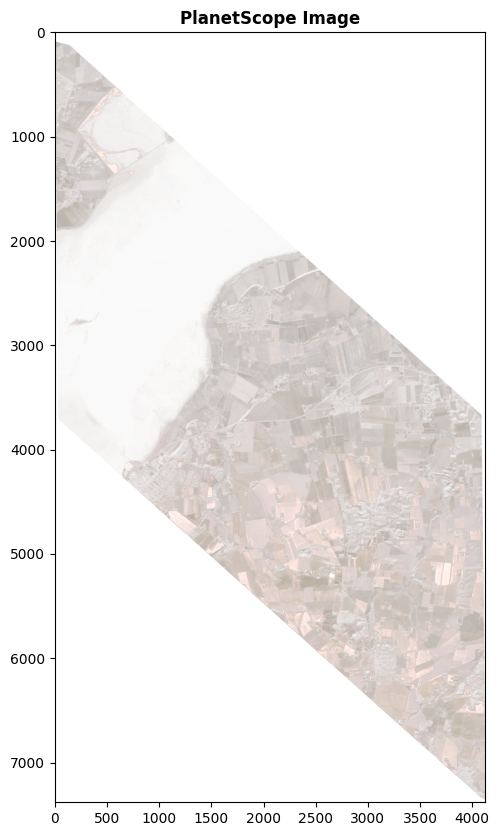

In [89]:
from rasterio.plot import show
import rasterio

with rasterio.open(BytesIO(resp.data)) as src:
    f = src.read()
    fig, ax = plt.subplots(figsize=(10, 10))
    show(f / 10000, ax=ax, title="PlanetScope Image")
    plt.show()

# Order Airbus SAR Data

In [ ]:
import requests

url = f"{platform_domain}/api/catalogue/manage/catalogs/user-datasets/{workspace}/commercial-data"
headers = {
    "accept": "application/json", 
    "Content-Type": "application/json", 
    "Authorization": f"Bearer {token}"
}
data =  {
    "url": f"https://staging.eodatahub.org.uk/api/catalogue/stac/catalogs/supported-datasets/catalogs/airbus/collections/airbus_sar_data/items/TSX-1_WS_S_wide_001R_97985_D33003943_29000",  
    "product_bundle": "general_use"
}

response = requests.post(url, headers=headers, json=data)

print("Status Code", response.status_code)
print("Response ", response.json())

Commercial data can also be ordered through the pyeodh Python client for EO Data Hub

In [97]:
# client.get_catalog_service().get_catalog(
#     "supported-datasets/catalogs/airbus"
# ).get_collection("airbus_sar_data").get_items()[0].commercial_data_order(
#     product_bundle="general_use"
# )

# Order Airbus Optical Data

In [96]:
import requests

url = f'https://staging.eodatahub.org.uk/api/catalogue/manage/catalogs/user-datasets/{workspace}/commercial-data'
headers = {
    'accept': 'application/json', 
    'Content-Type': 'application/json', 
    'Authorization': f'Bearer {token}'
}
data =  {
    "url": "https://staging.eodatahub.org.uk/api/catalogue/stac/catalogs/supported-datasets/catalogs/airbus/collections/airbus_phr_data/items/DS_PHR1A_201203021558128_FR1_PX_W080S03_0221_01728",  
    "product_bundle": "general_use", 
    "coordinates": [
        [
            [-79.8,-2.1], 
            [-79.8,-2.2], 
            [-79.95,-2.2], 
            [-79.95,-2.1], 
            [-79.8,-2.1]
        ]
    ]
}

response = requests.post(url, headers=headers, json=data)

print("Status Code", response.status_code)
print("Response ", response.json())

Status Code 200
Response  {'message': 'Item ordered successfully'}
